#                                                 Gashaw M. Goshu, September 26, 2020

In [1]:
# Import relevant libraries
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#import utils
%matplotlib inline

In [2]:
# open a file containing descriptors and yield
data = pd.read_csv(r"D:/Breast_cancer.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
data = data.drop(columns=['Unnamed: 32','id'])

In [6]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [8]:
X_data = data.drop(columns=['diagnosis'])
y_data = data['diagnosis']

In [9]:
labels =[]
for x in y_data:
    if x =='M':
        labels.append(1)
    if x == 'B':
         labels.append(0)
        

In [10]:
from pandas import DataFrame
result = DataFrame(labels, columns=['Diagnosis'])

In [11]:
result

,Diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

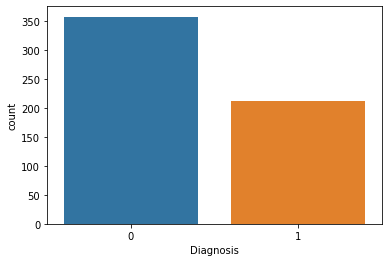

In [62]:
sn.countplot(data=result, x='Diagnosis',orient='v')

<AxesSubplot:>

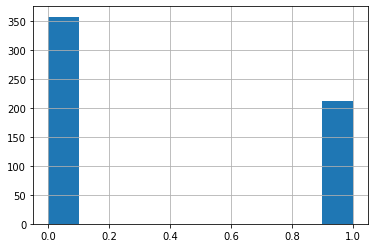

In [59]:
result["Diagnosis"].hist()

In [13]:
labels.count(1)

212

In [57]:
labels.count(0)

357

<AxesSubplot:>

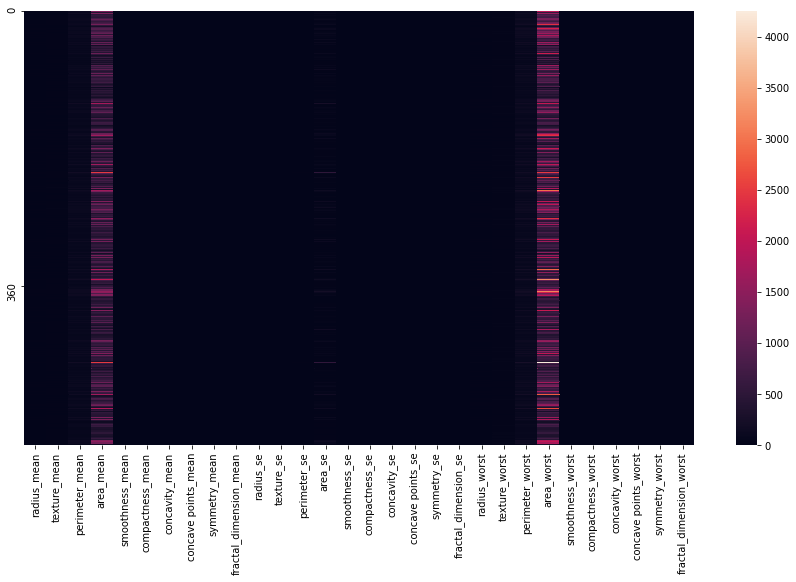

In [14]:
# Set the width and height of the figure
plt.figure(figsize=(15,8))
# Generate heatmap for the 10 columns or descriptors
sn.heatmap(data=X_data,yticklabels=360)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_data, labels, random_state=1)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [16]:
y_test.count(1)

55

In [17]:
# Data preprocessing or normalization
# scale train set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# scale test set
X_test = scaler.transform(X_test)

<AxesSubplot:>

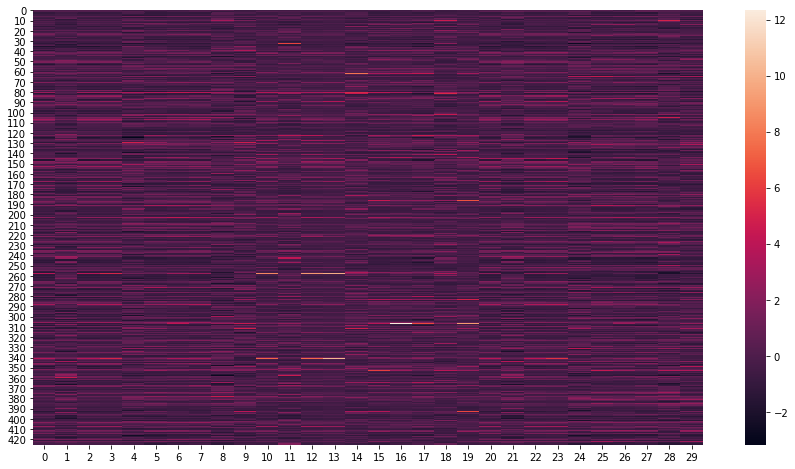

In [18]:
plt.figure(figsize=(15,8))
sn.heatmap(data=X_train,yticklabels=10)

In [19]:
X_train.shape

(426, 30)

<AxesSubplot:>

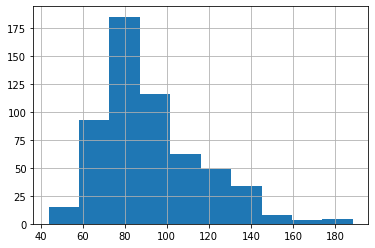

In [66]:
data['perimeter_mean'].hist()

In [70]:
# change yield to numpy array
y_train = np.array(y_train)
y_test = np.array(y_test)

In [22]:
# Model Training and prediction
rf.fit(X_train,y_train) # training using 70% of the data
predicted_yield =rf.predict(X_test) # predicting yield for 30% of the data

In [23]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, predicted_yield) # ==> TP/(TP + FP) = 50 / (50 + 2)

0.9615384615384616

In [24]:
recall_score(y_test, predicted_yield) # ==> TP/(TP + FN) = 50 / (50 + 5)

0.9090909090909091

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_yield)

0.951048951048951

In [26]:
accuracy_score?

In [27]:
confusion_matrix?

Object `confusion_matrix` not found.


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [29]:
conf_matrix = confusion_matrix(y_test, predicted_yield)
conf_matrix

array([[86,  2],
       [ 5, 50]], dtype=int64)

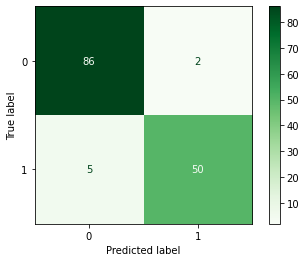

In [30]:
# Randomforest classifier
disp = plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Greens)
plt.show()

In [31]:
len(y_test)

143

In [32]:
np.count_nonzero(y_test==1)

55

In [33]:
np.count_nonzero(y_test==0)

88

In [34]:
# XGBoost the most widely used ML model in kaggle competition
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, random_state=42)

In [35]:
# Model Training and prediction
xgb.fit(X_train,y_train) # training using 70% of the data
predicted_yield2 = xgb.predict(X_test) # predicting yield for 30% of the data

In [36]:
conf_matrix1 = confusion_matrix(y_test, predicted_yield2)
conf_matrix1

array([[86,  2],
       [ 4, 51]], dtype=int64)

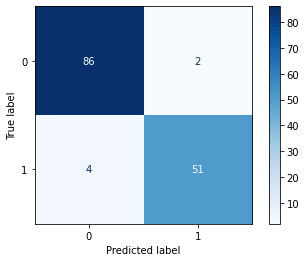

In [37]:
# XGBoost classifier
disp = plot_confusion_matrix(xgb, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [38]:
precision_score(y_test, predicted_yield2) # ==> TP/(TP + FP) = 51 / (51 + 2)

0.9622641509433962

In [39]:
recall_score(y_test, predicted_yield2) # ==> (TP/TP + FN) = 51 / (51 + 4)

0.9272727272727272

In [40]:
#Support Vector Machines classifier
svm =svm.SVC()

In [41]:
svm.fit(X_train,y_train)

SVC()

In [42]:
SVM_predict = svm.predict(X_test)

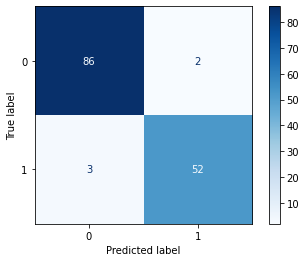

In [43]:
disp = plot_confusion_matrix(svm, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

In [44]:
support_vector_indices = svm.support_
print(support_vector_indices)

[  1   9  11  13  14  19  30  33  40  41  49  58  67  70  82  91 103 111
 114 120 127 129 130 135 145 152 160 161 173 177 185 187 193 195 231 268
 270 271 307 308 312 338 349 357 358 365 377 383 393 394 420   0  10  20
  50  57  59  62  65  66  81  86  90  92  96 107 113 115 119 123 133 142
 146 151 180 186 192 198 203 211 214 240 253 254 258 283 286 289 302 313
 331 341 353 374 375 379 380 384 387 403 406 408 409 413]


In [45]:
# K-nearst neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [46]:
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
knn_predict = KNN.predict(X_test )

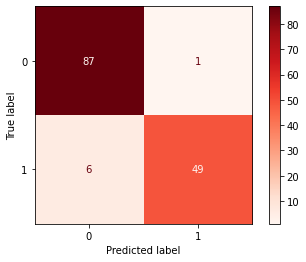

In [48]:
disp = plot_confusion_matrix(KNN, X_test, y_test,cmap=plt.cm.Reds)
plt.show()

In [49]:
# define the model
model = keras.Sequential([
    layers.Input(shape=(30,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [50]:
# compile the model:- here you need to include loss function, optimizer, metrics
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               15872     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 16,898
Trainable params: 16,898
Non-trainable params: 0
_________________________________________________________________


In [52]:
# categorically encode the labels
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [53]:
y_train.shape

(426,)

In [54]:
# Train the model
# history=model.fit(X_train,y_train, epochs=5,validation_split=0.2)

In [55]:
# Model performance using test set
# test_loss, test_acc = model.evaluate(X_test , y_test)
# print('test_acc:', test_acc)

In [56]:
# fig = plt.figure(figsize=(5,5))
# sn.regplot(x=predicted_yield4, y=y_test,line_kws={"lw":2,'ls':'--','color':'black',"alpha":0.2})
# plt.xlabel('Predicted Yield', color='blue')
# plt.ylabel('Observed Yield', color ='blue')
# plt.title("Tensorflow ", color='red')
# plt.grid(alpha=0.2)
# R_4 = mpatches.Patch(label="R2={:04.2f}".format(R_4))
# # rmse2 = mpatches.Patch(label="RMSE={:04.2f}".format(rmse2))
# plt.legend(handles=[R_4])